# Introdução à Inteligência Artificial
## Estudando o método K-NN

Samantha Dantas Medeiros
Dataset: Animal Crossing New Horizons, fish.csv @ [Kaggle](https://www.kaggle.com/datasets/jessicali9530/animal-crossing-new-horizons-nookplaza-dataset?select=fish.csv) | [Google Spreadsheet](https://docs.google.com/spreadsheets/d/13d_LAJPlxMa_DubPTuirkIV4DERBMXbrWQsmSh8ReK4/edit#gid=2030267432)

### Dependências e Funções

In [35]:
from statistics import mode

import pandas as pd
import seaborn as sns
import opendatasets as od
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix)

In [36]:
# Funções
def replace_size(value):
  if "x" in value:
    size = value.split("x")
    return int(size[0]) * int(size[1])
  else:
    return int(value)

### Dataframe e limpeza de dados

In [37]:
# Abrindo dataset
ds = pd.read_csv('./AnimalCrossing_fish.csv', encoding='utf-8')

ds.head() # exibe os 5 primeiros elementos do dataframe
ds.columns # exibe as colunas do dataframe

Index(['#', 'Name', 'Icon Image', 'Critterpedia Image', 'Furniture Image',
       'Sell', 'Where/How', 'Shadow', 'Catch Difficulty', 'Vision',
       'Total Catches to Unlock', 'Spawn Rates', 'NH Jan', 'NH Feb', 'NH Mar',
       'NH Apr', 'NH May', 'NH Jun', 'NH Jul', 'NH Aug', 'NH Sep', 'NH Oct',
       'NH Nov', 'NH Dec', 'SH Jan', 'SH Feb', 'SH Mar', 'SH Apr', 'SH May',
       'SH Jun', 'SH Jul', 'SH Aug', 'SH Sep', 'SH Oct', 'SH Nov', 'SH Dec',
       'Size', 'Surface', 'Description', 'Catch phrase', 'HHA Base Points',
       'HHA Category', 'Color 1', 'Color 2', 'Lighting Type', 'Icon Filename',
       'Critterpedia Filename', 'Furniture Filename', 'Internal ID',
       'Unique Entry ID'],
      dtype='object')

In [38]:
# Criando um novo Dataframe a partir das colunas desejadas do Dataframe original
df = ds.loc[:, ["#", "Name", "Where/How", "Shadow", "Size", "Catch Difficulty", "Surface", "Sell"]]

# Novas colunas e tratamento de strings para valores inteiros
df[['Min Spawn', 'Max Spawn']] = ds['Spawn Rates'].str.replace('–', '-').str.split('-', expand=True)
df["Size"] = df["Size"].apply(replace_size)
df['Surface'] = df['Surface'].replace({'Yes': 1, 'No': 0})
df["Catch Difficulty"] = df["Catch Difficulty"].replace({
    "Very Easy": 1,
    "Easy": 2,
    "Medium": 3,
    "Hard": 4,
    "Very Hard": 5
  })
df["Shadow"] = df["Shadow"].replace({
    "X-Small": 1,
    "Small": 2,
    "Medium": 3,
    "Large": 4,
    "X-Large": 5,
    "XX-Large": 6,
    "X-Large w/Fin": 7,
    "Long": 8 
})

# print(df["Where/How"].unique())

In [39]:
# Organizando o DataFrame
df = df.reindex(columns=[
    "#", 
    "Name",
    "Shadow",
    "Where/How",
    "Catch Difficulty",
    "Size",
    "Surface",
    "Min Spawn",
    "Max Spawn",
    "Sell"
  ])
df.head()

,#,Name,Shadow,Where/How,Catch Difficulty,Size,Surface,Min Spawn,Max Spawn,Sell
0,56,anchovy,2,Sea,1,1,0,2,5,200
1,36,angelfish,2,River,2,1,1,2,5,3000
2,44,arapaima,6,River,5,6,0,1,None,10000
3,41,arowana,4,River,5,2,1,1,2,10000
4,58,barred knifejaw,3,Sea,4,1,1,3,5,5000


### Pré-processamento

In [40]:
df.isnull().sum()

#                    0
Name                 0
Shadow               0
Where/How            0
Catch Difficulty     0
Size                 0
Surface              0
Min Spawn            0
Max Spawn           27
Sell                 0
dtype: int64

In [41]:
df.describe()

,#,Shadow,Catch Difficulty,Size,Surface,Sell
count,80.0000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,40.5000,3.550000,3.087500,1.587500,0.600000,3745.000000
std,23.2379,1.967457,1.342525,1.154997,0.492989,4517.151561
min,1.0000,1.000000,1.000000,1.000000,0.000000,100.000000
25%,20.7500,2.000000,2.000000,1.000000,0.000000,500.000000
50%,40.5000,3.000000,3.000000,1.000000,1.000000,1500.000000
75%,60.2500,5.000000,4.000000,2.000000,1.000000,5000.000000
max,80.0000,8.000000,5.000000,6.000000,1.000000,15000.000000


In [42]:
fish = df.copy()
# fish.drop("Name")
x = fish.drop(["#","Name","Where/How", "Catch Difficulty"], axis = 1)
y = fish.loc[:, "Catch Difficulty"]

x = RobustScaler().fit_transform(x)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 1)

C:\Users\saman\AppData\Local\Temp\ipykernel_3840\2381073123.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fish.corr(), cmap = "plasma");


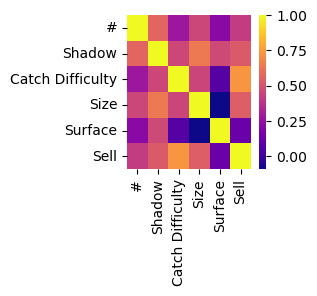

In [47]:
plt.figure(figsize = (2, 2))

sns.heatmap(fish.corr(), cmap = "plasma");